# Session 18: Important DataFrame Methods

In [1]:
import pandas as pd
import numpy as np

### `value_counts()`
Returns a Series containing the count of unique items.

In [ ]:
# implementing on a Series
a = pd.Series([1, 1, 2, 2, 3])
a.value_counts()

1    2
2    2
3    1
Name: count, dtype: int64

In [49]:
# implementing on a DataFrame
marks = pd.DataFrame([
    [100, 80, 10],
    [90, 70, 7],
    [120, 100, 14],
    [80, 70, 14],
    [80, 70, 14]
], columns=['iq', 'marks', 'package'])
print(marks)
marks.value_counts()

    iq  marks  package
0  100     80       10
1   90     70        7
2  120    100       14
3   80     70       14
4   80     70       14


iq   marks  package
80   70     14         2
90   70     7          1
100  80     10         1
120  100    14         1
Name: count, dtype: int64

In a DataFrame, it counts the occurence of each row in the entire dataframe, i.e. duplicate rows.

### Some tasks on ipl Dataset using `value_counts()`

In [4]:
ipl = pd.read_csv('ipl-matches.csv')
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


#### Task: Find which player has won the most 'Player of the Match', in Finals and Qualifiers. 

In [5]:
ipl['MatchNumber'].value_counts() == 1

MatchNumber
Final                 False
41                    False
40                    False
43                    False
46                    False
                      ...  
Qualifier             False
Elimination Final     False
72                    False
71                    False
3rd Place Play-Off     True
Name: count, Length: 80, dtype: bool

In [6]:
~ ipl['MatchNumber'].str.isdigit() # returns boolean series of values which are not digits, i.e. special matches

0       True
1       True
2       True
3       True
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Name: MatchNumber, Length: 950, dtype: bool

In [7]:
# applying the above defined mask in ipl df
ipl[~ ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

Player_of_Match
F du Plessis         3
SK Raina             3
KA Pollard           3
JJ Bumrah            2
AB de Villiers       2
MK Pandey            2
M Vijay              2
A Kumble             2
YK Pathan            2
SR Watson            2
HH Pandya            1
RM Patidar           1
JC Buttler           1
RR Pant              1
KS Williamson        1
MP Stoinis           1
TA Boult             1
SP Narine            1
RD Gaikwad           1
VR Iyer              1
DA Miller            1
Washington Sundar    1
NM Coulter-Nile      1
KV Sharma            1
BCJ Cutting          1
KH Pandya            1
SA Yadav             1
Rashid Khan          1
AD Russell           1
RG Sharma            1
A Nehra              1
DA Warner            1
MC Henriques         1
Harbhajan Singh      1
BJ Hodge             1
UT Yadav             1
V Sehwag             1
MS Bisla             1
MEK Hussey           1
CH Gayle             1
MS Dhoni             1
MM Patel             1
DE Bollinger      

This lists all of the players who have won 'Player of the Match' in Final or Qualifying matches.

#### Toss decision plot (Pie Chart)

<Axes: ylabel='count'>

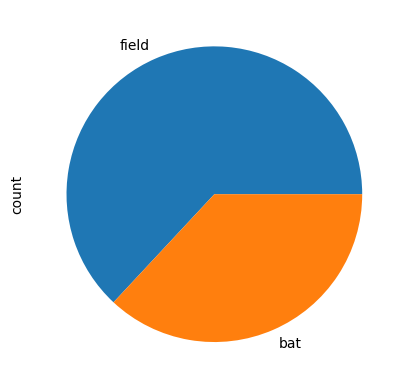

In [8]:
ipl['TossDecision'].value_counts().plot(kind='pie')

This concludes that majority of the times, the team captains choose **fielding** than **batting**.

#### Task: How many matches has each time played?

In [9]:
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

### `sort_values()`
Sorts the values on the basis of some values of a column or Series.

In [10]:
x = pd.Series([12, 14, 1, 56, 89])
x

0    12
1    14
2     1
3    56
4    89
dtype: int64

In [11]:
x.sort_values(ascending=False)

4    89
3    56
1    14
0    12
2     1
dtype: int64

In [12]:
movies = pd.read_csv('movies.csv')
movies.head(4)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)


Sort the dataframe rows on the basis of a column.

In [13]:
movies.sort_values(['title_x'])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1498,16 December (film),tt0313844,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/16_December_(film),16-Dec,16-Dec,0,2002,158,Action|Thriller,6.9,1091,16 December 1971 was the day when India won t...,Indian intelligence agents race against time t...,NaN,Danny Denzongpa|Gulshan Grover|Milind Soman|Di...,2 nominations,22 March 2002 (India)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN


Now, trying to emply `sort_values()` on a DataFrame containing **NaN** values.

In [14]:
students = pd.DataFrame(
    {
        'name':['nitish','ankit','rupesh',np.nan,'mrityunjay',np.nan,'rishabh',np.nan,'aditya',np.nan],
        'college':['bit','iit','vit',np.nan,np.nan,'vlsi','ssit',np.nan,np.nan,'git'],
        'branch':['eee','it','cse',np.nan,'me','ce','civ','cse','bio',np.nan],
        'cgpa':[6.66,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
        'package':[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]

    }
)

students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [15]:
students.sort_values(by='name', na_position='first')

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
8,aditya,NaN,bio,7.40,NaN
1,ankit,iit,it,8.25,5.0
4,mrityunjay,NaN,me,5.60,6.0
0,nitish,bit,eee,6.66,4.0
6,rishabh,ssit,civ,7.40,8.0
2,rupesh,vit,cse,6.41,6.0


By default, `sort_values()` places the rows with **NaN** values at the last. Though this can be changed by using the `na_position` param, as shown in the above code cell.

#### Task: Sort the movies DataFrame as per the year of release firsthand. Secondly, sort the pre-sorted DataFrame alphabetically while preserving the year basis sort.

In [16]:
movies.sort_values(['year_of_release', 'title_x'])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1575,Aalavandhan,tt0294264,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aalavandhan,Aalavandhan,Aalavandhan,0,2001,177,Action|Thriller,7.1,1746,The story follows Abhay (Haasan) who has a dis...,A psychopath tries to protect his twin brother...,The Fearless,Kamal Haasan|Raveena Tandon|Manisha Koirala|Ki...,1 win & 1 nomination,16 November 2001 (India)
1576,Aamdani Atthanni Kharcha Rupaiya,tt0305173,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aamdani_Atthanni...,Aamdani Atthanni Kharcha Rupaiya,Aamdani Atthanni Kharcha Rupaiya,0,2001,150,Comedy|Drama|Family,4.7,1026,Jhoomri and her husband Bhimsha move into a ...,In order to make ends meet three women steps ...,NaN,Govinda|Juhi Chawla|Tabu|Chandrachur Singh|Joh...,1 nomination,21 December 2001 (India)
1577,Aashiq (2001 film),tt0273406,https://upload.wikimedia.org/wikipedia/en/c/c6...,https://en.wikipedia.org/wiki/Aashiq_(2001_film),Aashiq,Aashiq,0,2001,160,Action|Drama|Romance,3.8,357,Pooja and Chander Kapoor have a heart-to-heart...,Pooja and Chander Kapoor have a heart-to-heart...,NaN,Bobby Deol|Karisma Kapoor|,NaN,26 January 2001 (India)
1579,Ajnabee (2001 film),tt0278291,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ajnabee_(2001_film),Ajnabee,Ajnabee,0,2001,165,Action|Crime|Drama,6.3,7480,A new couple get married and move to Switzerla...,Bobby Deol and Kareena Kapoor play a new coupl...,Trust no one,Akshay Kumar|Bobby Deol|Kareena Kapoor|Bipasha...,3 wins & 9 nominations,21 September 2001 (India)
1578,Aks (2001 film),tt0289845,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aks_(2001_film),Aks,Aks,0,2001,184,Action|Crime|Horror,5.9,1518,Aks is the story of a hunter and his prey. A c...,Raghavan Ghatge a psychotic terrorist and Ma...,There is a stranger in your mirror,Amitabh Bachchan|Raveena Tandon|Manoj Bajpayee...,9 wins & 14 nominations,13 July 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Ujda Chaman,tt11046300,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ujda_Chaman,Ujda Chaman,Ujda Chaman,0,2019,120,Comedy,8.1,1440,Ujda Chaman is about a 30 -year-old bachelor C...,Ujda Chaman is about a 30 -year-old bachelor C...,NaN,Sunny Singh Nijjar|Maanvi Gagroo|Saurabh Shukl...,NaN,1 November 2019 (USA)
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
60,Yaaram (2019 film),tt11007050,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaaram_(2019_film),#Yaaram,#Yaaram,0,2019,\N,Comedy|Romance,5.7,7,All set for an arranged marriage Rohit Bajaj ...,All set for an arranged marriage Rohit Bajaj ...,NaN,Siddhanth Kapoor|Prateik|Anita Raj|Ishita Raj|...,NaN,NaN


### `rank()`
Ranks the rows on the basis of the numeric values of a column. Row with the least value occurs at the first place by default. Only applicable on a **Series**.

In [17]:
batsman = pd.read_csv('batsman_runs_ipl.csv')
batsman.head()

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25


In [18]:
batsman['batsman_run'].rank(ascending=False)

0      166.5
1      226.0
2      535.0
3      329.0
4      402.5
       ...  
600    594.0
601    343.0
602    547.5
603     27.0
604    256.0
Name: batsman_run, Length: 605, dtype: float64

In [19]:
# creating a new column for rank in the df
batsman['batting_rank'] = batsman['batsman_run'].rank(ascending=False)
batsman.head()

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5


Now we can simply sort the whole DataFrame with respect to the 'batting_rank' column.

In [20]:
batsman.sort_values(by='batting_rank')

,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
600,Yash Dayal,0,594.0
595,YA Abdulla,0,594.0
57,AS Roy,0,594.0
63,Abdur Razzak,0,594.0


### `sort_index()`
Sorts the rows of the DataFrame as per the **index** of the DataFrame.

In [21]:
marks = {
    'maths': 67,
    'english': 57,
    'science': 89,
    'hindi': 100
}
marks_series = pd.Series(marks)
marks_series

maths       67
english     57
science     89
hindi      100
dtype: int64

In [22]:
# sorting the rows alphabetically on index
marks_series.sort_index()

english     57
hindi      100
maths       67
science     89
dtype: int64

In [23]:
# another example of sort_index()
movies.sort_index(ascending=False).head(5)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)


### `set_index()`
Set the DataFrame index using the existing columns. Only applicable on DataFrames.

In [24]:
batsman.set_index('batter', inplace=True)

In [25]:
batsman.sample(2)

,batsman_run,batting_rank
batter,,
C Madan,15,453.5
GC Smith,739,99.0


### `reset_index()`
Resets the index of the DataFrame and uses the default one instead. Applicable on both Series and DataFrames.
> Warning: To replace the index without using the existing one, do not directly set index, but first reset index and then set the new column. Else the existing index column will be deleted.

In [26]:
batsman.reset_index()
batsman.sample()

,batsman_run,batting_rank
batter,,
A Nehra,41,352.0


In [27]:
marks_series = marks_series.reset_index()
type(marks_series)

pandas.core.frame.DataFrame

Upon observing the above code cell, we realise that we can make a DataFrame out of a Series merely by using `reset_index()`

### `rename()`
Renames the names of the columns in the DataFrame. Applicable only on a DataFrame.

In [28]:
movies.set_index('title_x', inplace=True)

In [29]:
movies.rename(columns={'imdb_id': 'imdb', 'poster_path': 'URL'}, inplace=True)
movies.sample()

,imdb,URL,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Sonchiriya,tt8108200,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Sonchiriya,Sonchiriya,Sonchiriya,0,2019,143,Action|Crime|Drama,7.5,2322,This is the story of a group of rebels in Cham...,Set in the Chambal valley the film follows th...,NaN,Sushant Singh Rajput|Bhumi Pednekar|Manoj Bajp...,NaN,1 March 2019 (India)


Similarly, we can also rename the name of the index in DataFrame.

In [30]:
movies.rename(index={'Uri: The Surgical Strike': 'Uri', 'Battalion 609': 'Battalion'})

,imdb,URL,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


### `unique()`
Lists all the unique values in the Series. Works only on Series.

In [31]:
ipl['Season'].unique()

array(['2022', '2021', '2020/21', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2009/10', '2009', '2007/08'],
      dtype=object)

Now suppose we need to have a count the number of unique values, we may do the following:
> We must note that `nunique()` method will not consider missing, i.e. `NaN` values.

In [32]:
# either of the ways will work
print(len(ipl['Season'].unique()))
print(ipl['Season'].unique().shape[0])
print(ipl['Season'].nunique())

15
15
15


## Some methods on missing values

### `isnull()`
Returns a **Boolean Series**, placing *True* where there is a **NaN** value and *False* where there is not.

In [33]:
students['name'].isnull()

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7     True
8    False
9     True
Name: name, dtype: bool

In [34]:
students[students['name'].isnull()]

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.0,7.0
7,NaN,NaN,cse,10.0,9.0
9,NaN,git,NaN,NaN,NaN


### `notnull()`
Works just the opposite of `isnull()`, returns a **Boolean Series**, stating *False* where the value is Null and *True* where it is not.

In [35]:
students['name'].notnull()

0     True
1     True
2     True
3    False
4     True
5    False
6     True
7    False
8     True
9    False
Name: name, dtype: bool

In [36]:
students[students['name'].notnull()]

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
6,rishabh,ssit,civ,7.40,8.0
8,aditya,NaN,bio,7.40,NaN


### `hasnans()`
Checks if the entire Series has **NaN** values or not. Returns *True* if there are, and *False* if not.

In [37]:
students['name'].hasnans

True

Trying `isnull()` and `notnull()` on a whole DataFrame.

In [38]:
students.isnull()

,name,college,branch,cgpa,package
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,True,True,True,True,True
4,False,True,False,False,False
5,True,False,False,False,False
6,False,False,False,False,False
7,True,True,False,False,False
8,False,True,False,False,True
9,True,False,True,True,True


In [39]:
students.notnull()

,name,college,branch,cgpa,package
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,False,False,False,False,False
4,True,False,True,True,True
5,False,True,True,True,True
6,True,True,True,True,True
7,False,False,True,True,True
8,True,False,True,True,False
9,False,True,False,False,False


### `dropna()`
Drops the rows with **NaN** values. Works on both Series and DataFrames.

In [40]:
students['name'].dropna()

0        nitish
1         ankit
2        rupesh
4    mrityunjay
6       rishabh
8        aditya
Name: name, dtype: object

In [41]:
# will remove all the rows with a missing value in any column
students.dropna()

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


The strategy in the above code cell might prove to be a rather primitive one, since it banishes the rows with missing value in *any* column. This shall be overcome by using the method in the following code cell.

The below code cell will ensure to drop only the row which has **NaN** values in all the columns.

In [42]:
students.dropna(how='all')

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


Now suppose that we want to drop a row with **NaN** values only in one of the columns, then we will use the following method:

In [43]:
students.dropna(subset=['name'])

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
6,rishabh,ssit,civ,7.40,8.0
8,aditya,NaN,bio,7.40,NaN


We can also select multiple subsets.

In [44]:
students.dropna(subset=['name', 'college'])

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


### `fillna()`
Replaces the **NaN** values with some custom value.

In [45]:
students['name'].fillna('Unknown')

0        nitish
1         ankit
2        rupesh
3       Unknown
4    mrityunjay
5       Unknown
6       rishabh
7       Unknown
8        aditya
9       Unknown
Name: name, dtype: object

In [46]:
students['package'].fillna(students['package'].mean())

0    4.000000
1    5.000000
2    6.000000
3    6.428571
4    6.000000
5    7.000000
6    8.000000
7    9.000000
8    6.428571
9    6.428571
Name: package, dtype: float64

In [47]:
students['name'].fillna(method='ffill')

/tmp/ipykernel_6919/538422019.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students['name'].fillna(method='ffill')


0        nitish
1         ankit
2        rupesh
3        rupesh
4    mrityunjay
5    mrityunjay
6       rishabh
7       rishabh
8        aditya
9        aditya
Name: name, dtype: object

### `drop_duplicates()`
Drops all the duplicated rows in a DataFrame. The duplicate rows can be located with the help of `duplicated()`. The `keep` param in `drop_duplicates()` decides which occurence of the duplicate to remove and which to keep.

In [50]:
marks.duplicated()

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [ ]:
marks.drop_duplicates(keep='last')

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14


#### Task: Find the last match played by Virat Kohli in Delhi.
We will form a new column, listing all the players that played in Team1 as well as Team2, i.e. 22 players, 11 in each team.

In [51]:
ipl['all_players'] = ipl['Team1Players'] + ipl['Team2Players']
ipl.head(3)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."


In [71]:
playerCheckMask = ipl['all_players'].apply(lambda players: 'V Kohli' in players)
playerCheckMask

0      False
1       True
2       True
3      False
4      False
       ...  
945    False
946     True
947    False
948    False
949     True
Name: all_players, Length: 950, dtype: bool

In [70]:
cityCheckMask = ipl['City'] == 'Delhi'
cityCheckMask

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947     True
948    False
949    False
Name: City, Length: 950, dtype: bool

In [ ]:
# strategy 1
ipl[playerCheckMask & cityCheckMask].drop_duplicates(subset=['City'], keep='first')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Delhi Capitals,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ..."


In [83]:
# strategy 2
ipl[playerCheckMask & cityCheckMask].sort_values(by='Season').iloc[[-1]]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Delhi Capitals,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ..."


### `drop()`
Drops the rows and columns by **index** or **column names**. The `index` param receives either the index number or the index label for deletion of rows. Applicable on both Series and DataFrame

In [84]:
temp = pd.Series([10, 2, 3, 16, 45, 78, 10])
temp

0    10
1     2
2     3
3    16
4    45
5    78
6    10
dtype: int64

In [85]:
temp.drop(index=[0, 6])

1     2
2     3
3    16
4    45
5    78
dtype: int64

In [86]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [ ]:
students.drop(columns=['branch', 'cgpa'], inplace=True)

In [90]:
students

,name,college,package
0,nitish,bit,4.0
1,ankit,iit,5.0
2,rupesh,vit,6.0
3,NaN,NaN,NaN
4,mrityunjay,NaN,6.0
5,NaN,vlsi,7.0
6,rishabh,ssit,8.0
7,NaN,NaN,9.0
8,aditya,NaN,NaN
9,NaN,git,NaN


In [91]:
students.drop(index=[0, 8])

,name,college,package
1,ankit,iit,5.0
2,rupesh,vit,6.0
3,NaN,NaN,NaN
4,mrityunjay,NaN,6.0
5,NaN,vlsi,7.0
6,rishabh,ssit,8.0
7,NaN,NaN,9.0
9,NaN,git,NaN


### `apply()`
Applies a custom function, or mostly a lambda function to a Series or a DataFrame. Applicable to both Series and DataFrames. Some applications of `apply()` are provided below.

In [92]:
temp = pd.Series([10, 20, 30, 40, 50])

temp

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [93]:
def sigmoid(value):
    return 1/1+np.exp(value)

In [94]:
temp.apply(sigmoid)

0    2.202747e+04
1    4.851652e+08
2    1.068647e+13
3    2.353853e+17
4    5.184706e+21
dtype: float64

In [2]:
points_df = pd.DataFrame(
    {
        '1st point':[(3,4),(-6,5),(0,0),(-10,1),(4,5)],
        '2nd point':[(-3,4),(0,0),(2,2),(10,10),(1,1)]
    }
)

points_df

,1st point,2nd point
0,"(3, 4)","(-3, 4)"
1,"(-6, 5)","(0, 0)"
2,"(0, 0)","(2, 2)"
3,"(-10, 1)","(10, 10)"
4,"(4, 5)","(1, 1)"


In [6]:
def euclidean(row):
    pt_A = row['1st point']
    pt_B =  row['2nd point']

    return ((pt_A[0] - pt_B[0]) ** 2 + (pt_A[1] - pt_B[1]) ** 2) ** 0.5

In [7]:
points_df['distance'] = points_df.apply(euclidean, axis=1)

In [8]:
points_df

,1st point,2nd point,distance
0,"(3, 4)","(-3, 4)",6.000000
1,"(-6, 5)","(0, 0)",7.810250
2,"(0, 0)","(2, 2)",2.828427
3,"(-10, 1)","(10, 10)",21.931712
4,"(4, 5)","(1, 1)",5.000000
